<h2> Космический корабль "Титаник" <a class="tocSkip"> </h2>
    
Космический корабль "Титаник" был межзвездным пассажирским лайнером, запущенным месяц назад. С почти 13 000 пассажиров на борту, судно отлетело в свое первое плавание, перевозя эмигрантов из нашей Солнечной системы на три новые обитаемые экзопланеты, вращающиеся вокруг близлежащих звезд.

Во время обхода Альфа Центавра по пути к своему первому месту назначения - жаркому 55 Cancri E - неосвзойденный космический корабль Титаник сразился с пространствено-временной аномалией, скрытой в пылевом облаке. К сожалению, он встретил ту же судьбу, что и его тезка 1000 лет назад. Хотя корабль остался нетронутым, почти половина пассажиров была перевезена в другое измерение!
    
Чтобы помочь спасательным экипажам и вернуть потерянных пассажиров, нужно в этом соревновании предсказать, был ли пассажир перевезен в альтернативное измерение во время столкновения космического корабля «Титаник» с аномалией пространства-времени. Чтобы сделать эти прогнозы, нам предоставляется набор личных записей, извлеченных из поврежденной компьютерной системы корабля.

    
<h2> Цель работы  <a class="tocSkip"> </h2>
    
Предсказать, какие пассажиры переносятся в альтернативное измерение и предсказать Transported для пассажиров.

<h2> Описания файлов и полей данных  <a class="tocSkip"> </h2>
    
- train.csv - Личные записи примерно для двух третей (~8700) пассажиров, которые будут использоваться в качестве тренировочных данных.
    
    - PassengerId - Уникальный ид для каждого пассажира. Каждый Id принимает форму gggg_pp, где gggg указывает на группу, с которой путешествует пассажир, и pp - это их номер в группе. Люди в группе часто являются членами семьи, но не всегда.
    - HomePlanet - Планета, с которой пассажир уехал, как правило, их планета постоянного проживания.
    - CryoSleep - Указывает, выбран ли пассажир криосон на время рейса. Пассажиры в криосне ограничены в своих каютах.
    - Cabin - Номер салона, в котором остановился пассажир. Принимает форму палубы/номер/боку, где сторона может быть либо P для порта, либо S для старого борта.
    - Destination - Планета, на которую будет доставлен пассажир.
    - Age - Возраст пассажира.
    - VIP - оплатил ли пассажир специальную VIP-услугу во время рейса.
    - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Сумма, которую пассажиру выставили за каждый из многочисленных роскошных удобств космического корабля "Титаник".
    - Name - Имя и фамилия пассажира.
    - Transported - Был ли пассажир перевезен в другое измерение. Это цель, столбец, который вы пытаетесь предсказать.
    
    
- test.csv - Личные записи для оставшейся трети (~4300) пассажиров, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать стоимость Transported для пассажиров в этом наборе.
    
    
- sample_submission.csv - Файл отправки в правильном формате.
    
    - PassengerId- Ид. каждого пассажира в тестовом наборе.
    - Transported- Цель. Для каждого пассажира предскажите либо True, либо False.

In [1]:
!pip install catboost -q

In [2]:
!pip install lightgbm -q

## Изучение данных
### Загрузка данных

In [3]:
# Импоритруем библиотеки

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

In [4]:
# Определим константу

RANDOM_STATE = 12345

In [5]:
# Прочитаем файл и запишем в переменную df

df_sample_submission = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')


In [6]:
# Для удобства обработки обьеденим таблицы
# т.к. мы присоеденяем с низу таблицу разеденить данные для обучения можно будет по их обьему
# зафиксируем что в df_test имеет 4277 строк данных и в df_train у нас 8693 строк

data = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
# Создадим функцию info_func() для вывода всех необходимых методов показа информации df

def info_func(df):
    display(df.head(10), df.info(), df.describe(), df.isna().sum())

info_func(df_sample_submission)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
5,0027_01,False
6,0029_01,False
7,0032_01,False
8,0032_02,False
9,0033_01,False


None

,PassengerId,Transported
count,4277,4277
unique,4277,1
top,0013_01,False
freq,1,4277


PassengerId    0
Transported    0
dtype: int64

Отдельно расмотрю т.к. в df_sample_submission с даными все впорядке, их тут не много 4277 в записях нет пропусков, в этой таблице указаны ID всех пасажиров кто остался на карабле "Титаник". Так должен выглядеть нашь финальный вариант перед отправкой, где для пасажиров будет предсказана пропажа в булевом типе.

In [8]:
info_func(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


None

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

В таблице data уже есть что обсудить, df_test имеет так же 4277 строк данных как и в df_sample_submission и в df_train у нас 8693 строк данных, в общем у нас в таблице data получилось 12970 строк в каждом из признаков есть пропуски не более 3%, разберемся отдельно по признакам:

- PassengerId в обоих таблицах пропусков нет, но было бы удобнее перевести тип данных в INT и разделить этот признак на два признака, где первый признак номер группы, а второй указывал бы на номер пасажира в группе.
- HomePlanet в обоих таблицах есть пропуски, нужно посмотреть уникальные значения и убедиться что Земля и Европа это не одно и тоже. Предположительно пропуски могли взяться из за отсуцтвия постоянного места проживания т.е. пасажир был на этой планете что то типо 'на пересадке'.
- CryoSleep в обоих таблицах есть пропуски, данный признак записан по факту в тип Str, но можно указать его в бинарном виде, с пропусками в данном признаке большие вопросы, тут явно спит пасажир или нет, может пропуски появились из за технических проблем, вот что с ними делать большой вопрос.
- Cabin в обоих таблицах есть пропуски, тут у нас номер салона, в котором остановился пассажир, по данным в основном это семейные пары, возможно было бы верно заполнить пропуски ближайшими соседями или посмотреть признак Name. Есть возможность на основе этого признака создать доп. 3 признака : палуба, номер и сторона.
- Destination в обоих таблицах есть пропуски и тут по аналогии с Cabin можно взять группу и взять их среднее по месту прибытия и заполнить этими значениями пропуски, вполне возможно что группы состовляли на основе мест прибытия для удобства расположения вы выгрузки таких групп.
- Age этот признак так же с пропусками и визуально через функцию discribe, выбрасы или анамальные значения не выявлены, максимальный возраст 79 лет, минимальный указан ноль, вполне возможно что на карабле новорожденные дети и новые технологии 2912 года способны на рейсы с такими посажырами, средний возраст составляет 29 лет, 75% пасажиров в возрасте до 38 лет.
- VIP в обоих таблицах есть пропуски, мне кажется логично что если в этом признаке у пасажира нет значения True значит что VIP не подключен, предолгаю заменить значения пропусков на False.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck так же имеют пропуски, в аналогии с VIP, считаю что если нет суммы уплаченой за сервис, означает что все пропуски равны 0, т.к. пустые значения могут указывать на то что пасажир не пользовался сервисами. Так же было бы удобно знать сколько всего потратил пасажир во время поездки.
- Name для нас не имеет сильной значимости кроме как на основе него заполнять пропуски в других признаках, при обучении модели этот признак будет неинформативен, смысла заполнять или удалять его пропуски нет.

## Разведочный анализ данных

In [9]:
# Приводим название столбцов к нижнему регистру

data.columns = ['passenger_id', 'home_planet', 'cryo_sleep', 'cabin', 'destination', 'age',
                'vip', 'room_service', 'food_court', 'shopping_mall', 'spa', 'vr_deck',
                'name', 'transported']


In [10]:
data.home_planet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

Ага, посажиры в основном с трех планет, делаю предположение что Европа это отдельная планета и обьеденять с планетой Земля эти данные не нужно, далее посмотрим на распределение пасажиров относительно их планет.

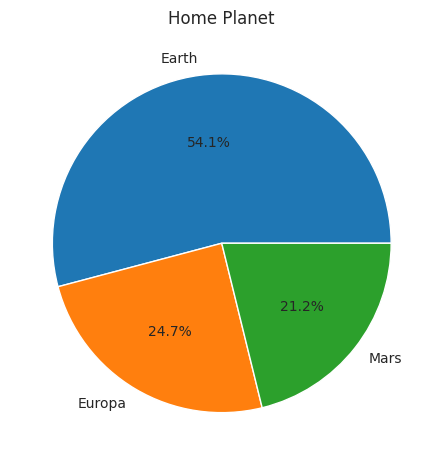

In [11]:
sns.set_style('darkgrid')
data['home_planet'].value_counts(normalize=True).plot(kind='pie',figsize=[5.5,5.5], legend=False, autopct='%1.1f%%',labels = ['Earth','Europa','Mars'])
plt.title("Home Planet")
plt.ylabel('')
plt.show()

Видим что больше половины пасажиров с планеты Земля, далее с небольшим приимуществом вторую позицию по численности занимает Европа, с планеты Марс пасажиров наименьшее кол-во.

Далее проверим как взаимосвязаны между собой признаки:
- пасажиры какой палнеты больше всего выбрали креосон
- пасажиры какой палнеты оплачивали VIP услуги  
- есть ли зависимость пропавших пасажиров по отношению к планетам убывания и прибывания.

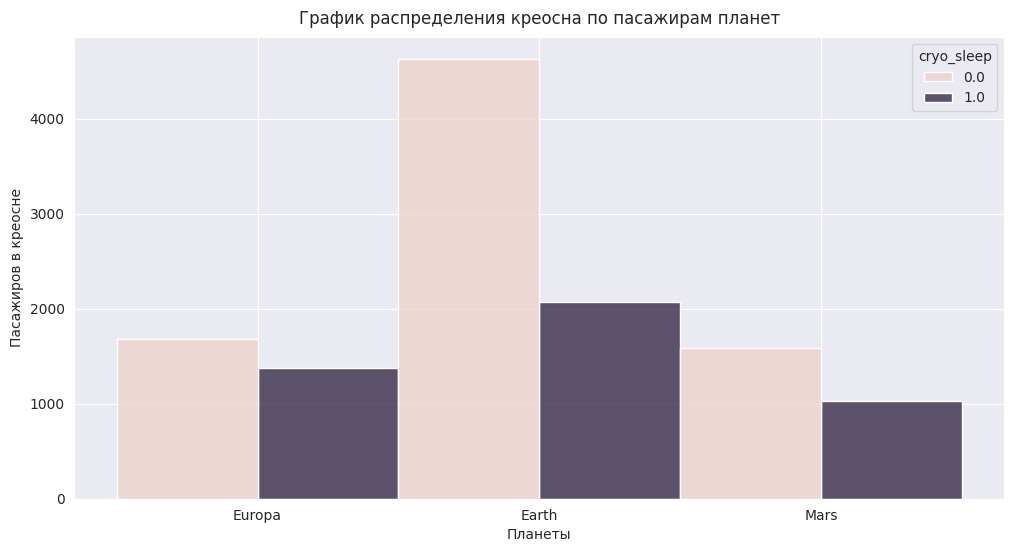

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='home_planet', hue='cryo_sleep', multiple="dodge")
plt.title('График распределения креосна по пасажирам планет', y=1.01)
plt.xlabel('Планеты')
plt.ylabel('Пасажиров в креосне')
plt.show();

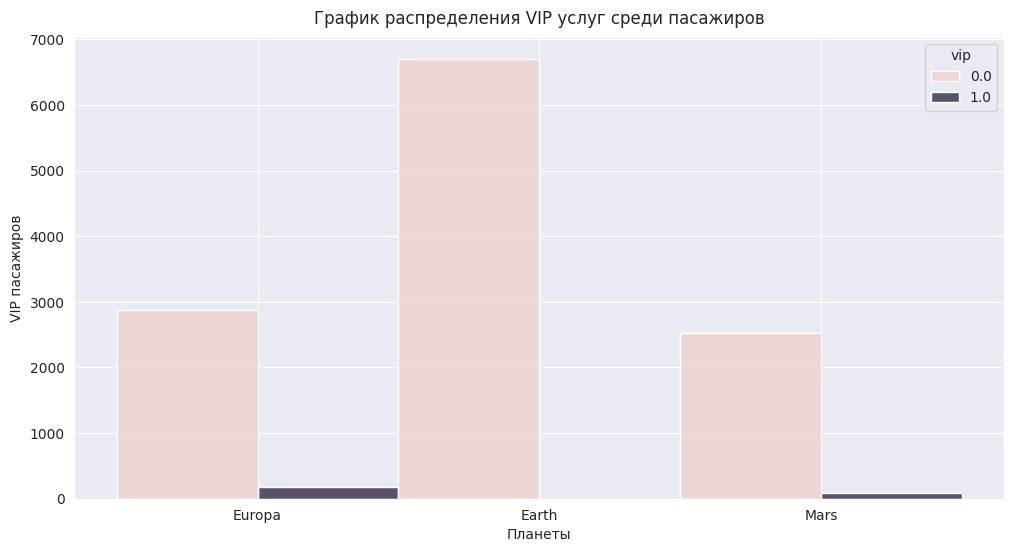

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='home_planet', hue='vip', multiple="dodge")
plt.title('График распределения VIP услуг среди пасажиров', y=1.01)
plt.xlabel('Планеты')
plt.ylabel('VIP пасажиров')
plt.show();

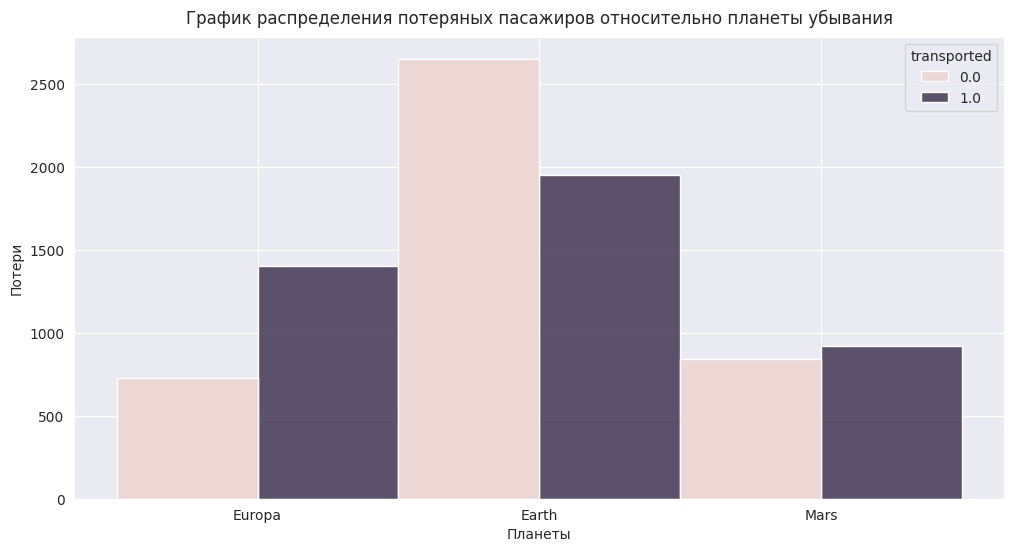

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='home_planet', hue='transported', multiple="dodge")
plt.title('График распределения потеряных пасажиров относительно планеты убывания', y=1.01)
plt.xlabel('Планеты')
plt.ylabel('Потери')
plt.show();

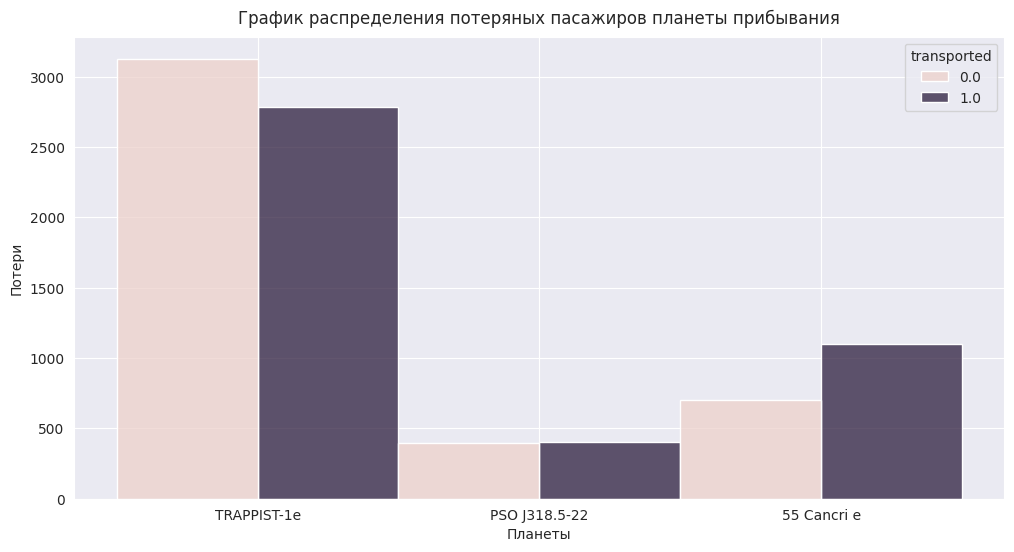

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='destination', hue='transported', multiple="dodge")
plt.title('График распределения потеряных пасажиров планеты прибывания', y=1.01)
plt.xlabel('Планеты')
plt.ylabel('Потери')
plt.show();

Из графиков можно сделать вывод что крео сон предпочитают долеко не все, примерно половина посажиров отказалась от креосна, возможно это связано с тем что люди за относительно не большое время доберутся до своих планет прибывания

Вип услуги очень редкая роскошь среди пасажиров, однако жители планет Марс и Европа не откозали себе в удовольствии воспользоватся доп сервисом, на обоих планетах показатель не привышает 15%.

Пропажа пасажира относительно места убывания гооврит о том что люди с планеты Земля пропадают чаще чем остальные, возможно из за того что их просто больше как мы в этом убедилсь на графике 'Home Planet'.

На графике исчезновения относительно планеты прибывания с большим отрывом выделяется планета 'TRAPPIST-le', но так же там и большой показатель оставшихся на месте пасажиров, возможно что эта планета самая активная по приему новых жителей и большое кол-во людей пропало именно где то вокруг этой космической системы.

##  Предобработка данных

In [16]:
# как и планировали разобьем passenger_id на два признака

data['number'] = data["passenger_id"].apply(lambda x: int(x[-2:]))  # Номер в группе
data['group_number'] = data["passenger_id"].apply(lambda x: int(x[:4]))  # Номер группы

In [17]:
# Распределим на отдельные признаки колонку cabin

data['cabin'] = data['cabin'].apply(lambda x: str(x).split('/') if pd.notna(x) and x != -1 else x)

# Дадим описание что происходит в данном коде
# Этот код заменяет значения в массиве data['cabin'] на результат вызова функции.
# Если элемент data['cabin'] является списком и первый элемент этого списка доступен (т.е. длина списка больше 0)
# Tогда этот список заменяется на свой первый элемент. Иначе, значение остается неизменным (но, возможно, меняется на np.nan).

data['deck'] = data['cabin'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
data['num'] = data['cabin'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else np.nan)
data['side'] = data['cabin'].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else np.nan)


In [18]:
# Заполняем пропуски потенциальными значениями
# Ход мыслей заполнения описан в выводе первичного анализа

data.age.fillna(data.age.mean(), inplace = True)
data.vip.fillna(data.vip.mean(), inplace = True)

data[['room_service',
      'food_court',
      'shopping_mall',
      'spa',
      'vr_deck']] = data[['room_service',
                          'food_court',
                          'shopping_mall',
                          'spa',
                          'vr_deck']].fillna(0)

# Создадим доп признак общей сыммы за вип сервисы

data['сomforts_sum'] = data['room_service'] + data['food_court'] + data['shopping_mall'] + data['spa'] + data['vr_deck']


In [19]:
# Удалим ненужные признаки

data.drop(columns='cabin', axis=1, inplace = True)
data.drop(columns = 'passenger_id',axis=1, inplace=True)
data.drop(columns = 'name',axis=1, inplace=True)

## Подготовить данные к обучению


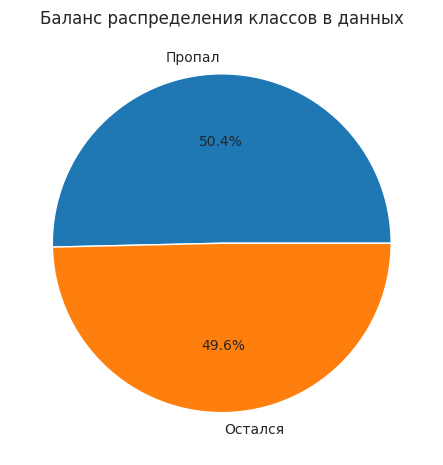

In [20]:
# Перед разбивкой глянем что у нас по балансу классов.

sns.set_style('darkgrid')
data.transported.value_counts(normalize=True).plot(kind='pie',
                                                   figsize=[5.5,5.5],
                                                   legend=False,
                                                   autopct='%1.1f%%',
                                                   labels=['Пропал','Остался'])
plt.title('Баланс распределения классов в данных')
plt.ylabel('')
plt.show()

In [21]:
# переведем значения в нужный тип для дальнейшей работы

data[['age',
      'room_service',
      'food_court',
      'shopping_mall',
      'spa',
      'vr_deck',
      'сomforts_sum']] = data[['age',
                               'room_service',
                               'food_court',
                               'shopping_mall',
                               'spa',
                               'vr_deck',
                               'сomforts_sum']].astype(int)

data['vip'] = data['vip'].astype(bool)

In [22]:
# Пришло время для разделения выборки и тут же поставим метку
# что бы при get_dummies небыло разности числа признаков.

data_train = data.loc[:8692]
data_test = data.loc[8693:].drop(columns = 'transported')

# укажим метку

data_train['label'] = 'train'
data_test['label'] = 'score'

In [23]:
for i in ['home_planet',	'cryo_sleep', 'destination']:
  print(data_train[i].value_counts())


Earth     4602
Europa    2131
Mars      1759
Name: home_planet, dtype: int64
False    5439
True     3037
Name: cryo_sleep, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64


In [24]:
data_concat = pd.concat([data_train , data_test])

In [25]:
# Переведем наши категориальные признаки с помощью get_dummies

data_concat = pd.get_dummies(data_concat, columns= ['home_planet',
                                                    'cryo_sleep',
                                                    'destination',
                                                    'deck',
                                                    'num',
                                                    'side'])

In [26]:
#  После того как наши датасет получил кадировку данных можно его разбить и удалить метки
# Таким образом мы сохранили нужные обьемы выборок для удобства вычеслений метрики

data_train = data_concat[data_concat['label'] == 'train']
data_train = data_train.drop('label', axis=1)

data_test = data_concat[data_concat['label'] == 'score']
data_test = data_test.drop(columns = ['label','transported'], axis=1)

In [27]:
# Инициализируем KNeighborsRegressor с числом соседей (n_neighbors)
knn_imputer = KNNImputer(n_neighbors=2)

# Применяем KNeighborsRegressor для заполнения пропусков оставшимся признакам
df_imputed_train = knn_imputer.fit_transform(data_train)


# Преобразуем результат обратно в датафрейм

data_train_imputed = pd.DataFrame(df_imputed_train, columns=data_train.columns)
data_train_imputed


,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,transported,number,group_number,...,num_992,num_993,num_994,num_995,num_996,num_997,num_998,num_999,side_P,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0,1.0,9276.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9278.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8690,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,1.0,9279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8691,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0,1.0,9280.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:

# Разбиваем исходные данные на обучающую и тестовую выборки.

features_train, features_test, target_train, target_test = train_test_split(data_train_imputed.drop(columns = 'transported'),
                                          data_train_imputed.transported,
                                          test_size = 0.25,
                                          random_state = RANDOM_STATE)

# Посмотрим на размеры

features_train.shape, target_train.shape


((6519, 1922), (6519,))

## Обучение модели

In [29]:
parameters = {'lr__solver' :['saga','liblinear', 'lbfgs'],
              'lr__C' : [0.01, 0.1, 1]} #определяет значение параметра C в регуляризаторе L1 или L2.  # определяет алгоритм оптимизации, используемый для поиска оптимальных весов модели.

# Kраткое описание что происходит в коде, добавляются параметры для GridSearchCV.
# Затем модель GridSearchCV используется для поиска оптимальных значений параметров модели, используя перекрестную проверку (cv=5).
# Наконец, модель оценивается на тренировочных данных (features_train и target_train), а лучший результат отображается в виде ROC-AUC.
# Процессы других моделей идентичны.

steps = [('lr', LogisticRegression(random_state = RANDOM_STATE))]
pipe = Pipeline(steps)
lr_model = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    scoring = 'accuracy')

lr_model.fit(features_train, target_train)


GridSearchCV(estimator=Pipeline(steps=[('lr',
                                        LogisticRegression(random_state=12345))]),
             param_grid={'lr__C': [0.01, 0.1, 1],
                         'lr__solver': ['saga', 'liblinear', 'lbfgs']},
             scoring='accuracy')

In [30]:


parameters = {'cbc__depth': [6], # глубина дерева решения
              'cbc__iterations': [500], # количество итераций
              'cbc__learning_rate': [0.007], # параметр регуляризации Лассо, который определяет коэффициент регуляризации.
              'cbc__l2_leaf_reg': [0.02], # функция потерь, используемая для обучения модели.
              'cbc__bootstrap_type': ["Bayesian"]  # тип бустинга, используемый в алгоритме
             }

steps = [('cbc', CatBoostClassifier(random_state=RANDOM_STATE))]
pipe = Pipeline(steps)
cbc_model = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    scoring = 'accuracy')

cbc_model.fit(features_train, target_train)



0:	learn: 0.6894756	total: 55.1ms	remaining: 27.5s
1:	learn: 0.6858668	total: 62.7ms	remaining: 15.6s
2:	learn: 0.6831600	total: 70.1ms	remaining: 11.6s
3:	learn: 0.6801864	total: 77.4ms	remaining: 9.6s
4:	learn: 0.6770123	total: 87.7ms	remaining: 8.69s
5:	learn: 0.6738984	total: 100ms	remaining: 8.26s
6:	learn: 0.6708348	total: 108ms	remaining: 7.58s
7:	learn: 0.6679411	total: 115ms	remaining: 7.05s
8:	learn: 0.6645784	total: 122ms	remaining: 6.67s
9:	learn: 0.6615368	total: 130ms	remaining: 6.38s
10:	learn: 0.6588077	total: 138ms	remaining: 6.12s
11:	learn: 0.6565604	total: 145ms	remaining: 5.89s
12:	learn: 0.6537511	total: 152ms	remaining: 5.7s
13:	learn: 0.6509145	total: 160ms	remaining: 5.54s
14:	learn: 0.6483153	total: 167ms	remaining: 5.4s
15:	learn: 0.6455696	total: 174ms	remaining: 5.28s
16:	learn: 0.6430265	total: 182ms	remaining: 5.16s
17:	learn: 0.6402486	total: 189ms	remaining: 5.07s
18:	learn: 0.6376508	total: 196ms	remaining: 4.97s
19:	learn: 0.6344414	total: 203ms	remai

GridSearchCV(estimator=Pipeline(steps=[('cbc',
                                        <catboost.core.CatBoostClassifier object at 0x7fbe9b709030>)]),
             param_grid={'cbc__bootstrap_type': ['Bayesian'], 'cbc__depth': [6],
                         'cbc__iterations': [500], 'cbc__l2_leaf_reg': [0.02],
                         'cbc__learning_rate': [0.007]},
             scoring='accuracy')

In [31]:
parameters = {
    'lgb__learning_rate': [0.04],
    'lgb__n_estimators': [260],
    'lgb__num_leaves' : [20],
    'lgb__max_depth' : [9],
    'lgb__subsample' : [0.7],
    'lgb__boosting_type' : ['gbdt'], # тип бустинга, используемый в алгоритме
    'lgb__objective' : ['binary'] # цель обучения модели, которая может быть “binary”
    }

steps = [('lgb', LGBMClassifier(random_state=RANDOM_STATE))]
pipe = Pipeline(steps)
lgb_model = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    error_score='raise',
    scoring = 'accuracy')

lgb_model.fit(features_train, target_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2615, number of negative: 2600
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1910
[LightGBM] [Info] Number of data points in the train set: 5215, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501438 -> initscore=0.005753
[LightGBM] [Info] Start training from score 0.005753
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2614, number of negative: 2601
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1906
[LightGBM] [Info

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('lgb',
                                        LGBMClassifier(random_state=12345))]),
             param_grid={'lgb__boosting_type': ['gbdt'],
                         'lgb__learning_rate': [0.04], 'lgb__max_depth': [9],
                         'lgb__n_estimators': [260], 'lgb__num_leaves': [20],
                         'lgb__objective': ['binary'],
                         'lgb__subsample': [0.7]},
             scoring='accuracy')

In [32]:
parameters = {'xgb__max_depth': [6], # глубина дерева решения
              'xgb__n_estimators' : [10],  # количество деревьев в ансамбле
              'xgb__learning_rate': [0.009], # параметр регуляризации Лассо, который определяет коэффициент регуляризации.
              'xgb__booster': ["gbtree"]  # тип бустинга, используемый в алгоритме
             }

steps = [('xgb', XGBClassifier(random_state=RANDOM_STATE))]
pipe = Pipeline(steps)
xgb_model = GridSearchCV(
    estimator = pipe,
    param_grid = parameters,
    scoring = 'accuracy')

xgb_model.fit(features_train, target_train)


GridSearchCV(estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      l...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=12345, ...))]),
             param_grid={'xgb__booster': ['gbtree'],
                         'xgb__learning_rate': [0.009], 'xgb__max_depth': [6],
                         'xgb__n_estimators': [10]},
             scoring='accuracy')

In [39]:
pd.DataFrame(data = [[round(lr_model.best_score_, 4)],
                    [round(cbc_model.best_score_, 4)],
                    [round(lgb_model.best_score_, 4)],
                    [round(xgb_model.best_score_, 4)]],
             index = ['Logistic Regression', 'CatBoostClassifier', 'LGBMClassifier', 'XGBClassifier'],
             columns = ['Accuracy']
             )


,Accuracy
Logistic Regression,0.7955
CatBoostClassifier,0.8009
LGBMClassifier,0.8076
XGBClassifier,0.7797


## Проверка данных на тестовой выборке

In [34]:

prediction = lgb_model.predict(data_test)


In [35]:
test_id = pd.read_csv("test.csv").PassengerId
test_id.shape

(4277,)

In [36]:
submit = pd.DataFrame()
submit['PassengerId'] = test_id
submit['Transported'] = prediction.astype(bool)

In [37]:
submit.to_csv("submission.csv", index=False)

In [38]:
submit

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


## Вывод

И так, мы поучавствовали в соревновании по Spaceship Titanic и по итогу создания "submission.csv" мы заняли 280 место с метрикой Score: 0.80453 среди 2120 участников, думаю что это хороштй результат, значения метрики и общая цель достигнута.

В результате при помощи подбора параметров получилось улучшить значение метрики более чем на один процент и перешагнуть значение итогового Score в 0.80.

Какие идеи для улучшения результата я на данный момент вижу:

· попробовать выделить новые признаки на основе имеющихся;

· попытаться найти закономерности в других признаках;

· попробовать другие ML-модели.

Если у вас есть идеи по улучшению, пожалуйста, поделитесь ими в комментариях.